<a href="https://colab.research.google.com/github/SujayVivek/MLSP-Lab-8th-Sem-2026/blob/main/exp2bSPML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

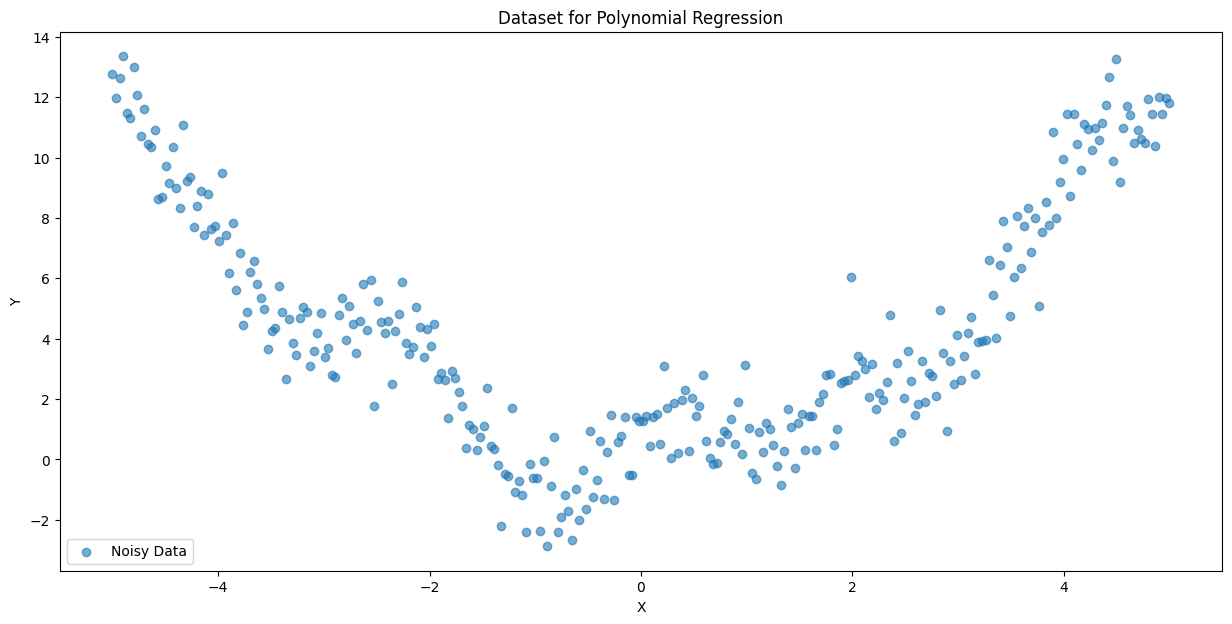

In [1]:
# Task 1: Rerun and verify consistency [cite: 224, 225]
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility [cite: 186, 188]
np.random.seed(42)

# Generate x values: 300 samples between -5 and 5 [cite: 190]
x = np.linspace(-5, 5, 300).reshape((-1, 1))

# Generate y values using sine, cosine, and polynomial functions [cite: 191, 196]
y_true = np.sin(2*x) + 0.5 * x**2 + np.cos(3*x)

# Added Gaussian noise v(n) ~ N(0, 1) [cite: 193, 195]
noise = np.random.normal(0, 1, x.shape)
y_noisy = y_true + noise
y = y_noisy.reshape((-1, 1)) # [cite: 199]

# Visualization of the dataset [cite: 201, 206, 219]
plt.figure(figsize=(15, 7))
plt.scatter(x, y_noisy, label='Noisy Data', alpha=0.6)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Dataset for Polynomial Regression')
plt.show()

In [2]:
# Task 2: Create Matrix X (degree 2) and Train-Test Split

# 1. Feature Scaling (Standardization) [cite: 133, 136]
def standardize_features(data):
    mu = np.mean(data)
    sigma = np.std(data)
    return (data - mu) / sigma, mu, sigma

x_scaled, mu_x, sigma_x = standardize_features(x)

# 2. Create Matrix X for degree n=2 [cite: 115, 118, 226]
def create_poly_matrix(x_val, degree):
    m = x_val.shape[0]
    X_mat = np.ones((m, degree + 1)) # Bias term theta_0 [cite: 112]
    for j in range(1, degree + 1):
        X_mat[:, j] = x_val[:, 0]**j
    return X_mat

X_poly = create_poly_matrix(x_scaled, degree=2)

# 3. Train-Test Split (80% Train, 20% Test) [cite: 145, 226]
m_total = X_poly.shape[0]
indices = np.random.permutation(m_total)
train_size = int(0.8 * m_total)

train_idx, test_idx = indices[:train_size], indices[train_size:]

X_train, y_train = X_poly[train_idx], y[train_idx]
X_test, y_test = X_poly[test_idx], y[test_idx]

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

X_train shape: (240, 3), X_test shape: (60, 3)


In [8]:
# Task 3: Implement Gradient Descent to learn Theta [cite: 227]

def train_polynomial_regression(X, y, alpha=0.1, epochs=500):
    m, n_params = X.shape
    # Initialize parameters Theta [cite: 120]
    Theta = np.zeros((n_params, 1))
    loss_history = []

    for _ in range(epochs):
        # Predicted values Y_hat [cite: 108, 120]
        y_hat = np.dot(X, Theta)

        # Mean Squared Error Loss [cite: 165, 171]
        loss = (1 / (2 * m)) * np.sum((y - y_hat)**2)
        loss_history.append(loss)

        # Vectorized Gradient Update [cite: 177]
        # Theta = Theta - (alpha/m) * [ (Y - Y_hat).T * X ].T
        gradient = (1 / m) * np.dot(X.T, (y_hat - y))
        Theta = Theta - alpha * gradient

    return Theta, loss_history

# Task 4: Train for 500 epochs [cite: 228]
Theta_optimized, train_loss = train_polynomial_regression(X_train, y_train, alpha=0.1, epochs=500)

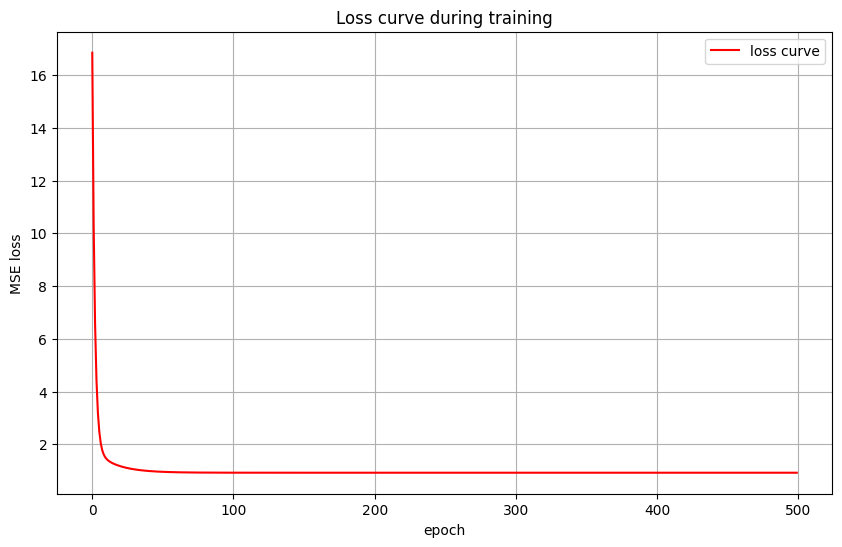

In [9]:
# Task 4 (Continued): Plot Training Loss [cite: 228, 232]
plt.figure(figsize=(10, 6))
plt.plot(range(500), train_loss, color='red', label='loss curve')
plt.xlabel('epoch')
plt.ylabel('MSE loss')
plt.title('Loss curve during training')
plt.grid(True)
plt.legend()
plt.show()

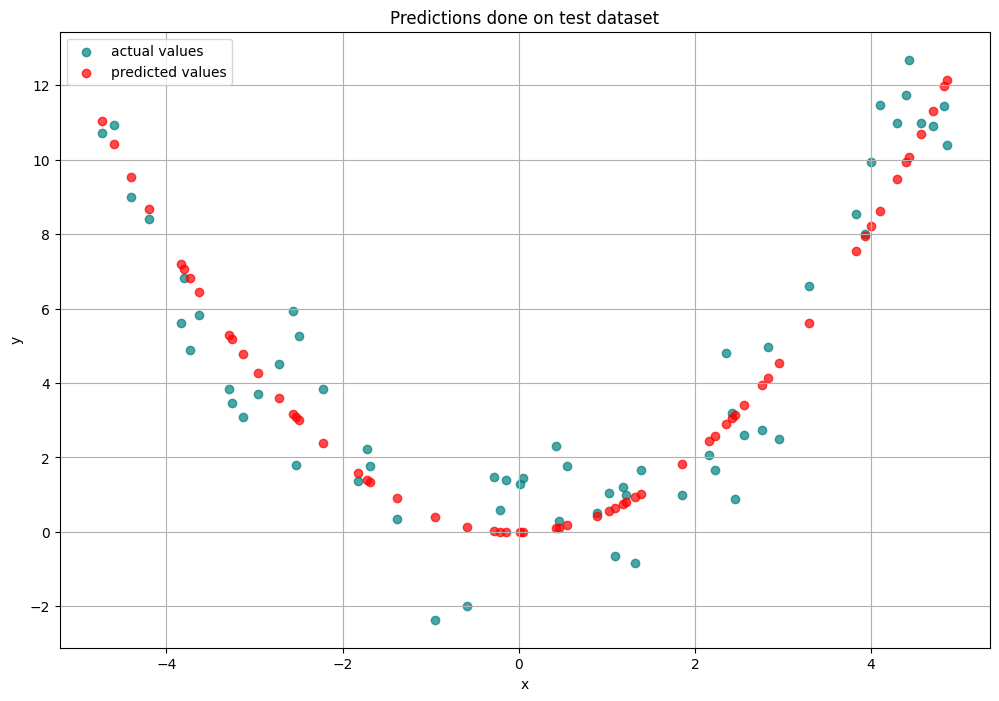

Mean Squared Error on Test Set: 1.8969


In [5]:
# Task 5: Predict values of the test set and plot [cite: 229, 253, 263]

# Generate predictions for the test set
y_test_pred = np.dot(X_test, Theta_optimized)

# Plotting the results [cite: 255]
plt.figure(figsize=(12, 8))
plt.scatter(x[test_idx], y_test, color='teal', label='actual values', alpha=0.7)
plt.scatter(x[test_idx], y_test_pred, color='red', label='predicted values', alpha=0.7)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions done on test dataset')
plt.legend()
plt.grid(True)
plt.show()

# Final accuracy check (MSE)
final_test_mse = np.mean((y_test - y_test_pred)**2)
print(f"Mean Squared Error on Test Set: {final_test_mse:.4f}")